#**Feature Transformation and Scaling for Machine Learning**
- Feature transformation is the mathematical transformation process in which we apply a mathematical formula to a particular feature and transform the values which increase the performance of our models and such new values can be used in further work.
-Feature transformation is the process of modifying  data but keeping the information of dataset. 

- Feature transformation and Scaling  help in bringing the features to the **same scale and change into normal distribution(gaussian distribution).**



###**Why Feature Transformations?**
- Some Machine Learning models, like **Linear and Logistic regression,Principle Component Analysis(PCA), and Linear Discriminant Analysis(LDA) assume that the features follow a normal distribution(gaussian distribution). But in real life dataset most of the features/variables  follow a skewed distribution.**
- By applying some feature transformations techniques to these skewed features, we can convert this skewed distribution to a normal distribution(gaussian distribution) so, this can increase the performance of our models.

##**Techniques Present in Feature Transformation:**
- **Categorical features encoding:**Categorical data is non-numeric data.We encode categorical data numerically because math is generally done using numbers.
- **Mathematical transformation:**Mathematical transformations are process to convert the numerical features value into other mathematical values such as  logarithm, exponent, power,reciprocal etc.
- **Feature Scaling:**Feature Scaling is a technique of bringing down the values of all the independent features of our dataset on the same scale.


##**Categorical Features Encoding:**
Categorical features encoding is a process of converting categorical data into numerical format so  numerical values  provided to the models improve the predictions.
Types of categorical data are Nominal data and Ordinal data. 
- **Nominal data:** This type of categorical data consists of the name variable without ordered in a meaningful way. For example, in any organization, the name of the different departments like research and development department, human resource department, accounts and billing department etc.
- **Ordinal data:** This type of categorical data consists of a **set of orders or scales.** For example, socio economic status of TB Ltd. employees are “low income”,”middle income”,”high income”.

##**Few types of categorical features encoding are:**

##**(a) One-Hot Encoding:**
One hot encoding is useful for Nominal data that has no relationship to each other or name variable without ordered in a meaningful way.In One-Hot Encoding, each category of any categorical variable gets a new variable. It maps each category with binary numbers (0 or 1).

##**Import Essential libraries:**

In [1]:
import pandas as pd                                      # For dataframe handling and operations.
import numpy as np                                       # For numpy array operations.
import matplotlib.pyplot as plt                          # ploting ,visualization data
from sklearn.preprocessing import OneHotEncoder          #For one hot encoding.
from sklearn.preprocessing import LabelEncoder           #For label/ordinal data encoding.
import scipy.stats as stats                              # handel statistics, probability distributions functions.
import seaborn as sns                                    # data visualized and analysis using the heat map,boxplot for outlier detection. 

In [2]:
from google.colab import drive                           #mount your Google Drive in your virtual machine(VM).
drive.mount('/gdrive')                                   #Access  the data  drive because of different server of colab and drive. 

Mounted at /gdrive


###**The data set used is obtained from kaggle data sets and the link is here:**
Taking the dataset of cars from  www.kaggle.com

In [5]:
car_dataset=pd.read_csv('/gdrive/My Drive/ML Project /Feature Engineering /2.Feature Transformation for ML/cars.csv',quoting=3)
                                 #Read data file with path location step by step path location from My Drive.

In [6]:
car_dataset.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [7]:
car_dataset['fuel'].value_counts()  #count of unique occurences in the specified column.

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

**OneHotEncoding using Pandas:**
- OneHotEncoding using Pandas is generally use for data analysis purpose.
- Use **get_dummies** function to generate one-hot encoded output

In [8]:
pd.get_dummies(car_dataset,columns=['fuel'])


,brand,km_driven,owner,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti,145500,First Owner,450000,0,1,0,0
1,Skoda,120000,Second Owner,370000,0,1,0,0
2,Honda,140000,Third Owner,158000,0,0,0,1
3,Hyundai,127000,First Owner,225000,0,1,0,0
4,Maruti,120000,First Owner,130000,0,0,0,1
...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,First Owner,320000,0,0,0,1
8124,Hyundai,119000,Fourth & Above Owner,135000,0,1,0,0
8125,Maruti,120000,First Owner,382000,0,1,0,0
8126,Tata,25000,First Owner,290000,0,1,0,0


**K-1 OneHotEncoding:**
- One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information.

In [9]:
pd.get_dummies(car_dataset,columns=['fuel'],drop_first=True)

,brand,km_driven,owner,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti,145500,First Owner,450000,1,0,0
1,Skoda,120000,Second Owner,370000,1,0,0
2,Honda,140000,Third Owner,158000,0,0,1
3,Hyundai,127000,First Owner,225000,1,0,0
4,Maruti,120000,First Owner,130000,0,0,1
...,...,...,...,...,...,...,...
8123,Hyundai,110000,First Owner,320000,0,0,1
8124,Hyundai,119000,Fourth & Above Owner,135000,1,0,0
8125,Maruti,120000,First Owner,382000,1,0,0
8126,Tata,25000,First Owner,290000,1,0,0


**OneHotEncoding using Sklearn:**
- Mostly we used OneHotEncoding using Sklearn in **Machine learning project** because **sklearn.preprocessing.OneHotEncoder** remember position of all columns,but pandas do not remember the position of each columns,so pandas OneHotEncoding is used for data analysis and Sklearn OneHotEncoding is used for ML Project work.
- Scikit-learn's uses **sklearn.preprocessing.OneHotEncoder** for producing one hot encoding.This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter).
- creat OneHotEncoder object and note that parameter drop = ‘first’ will handle dummy variable traps.
- Perform OneHotEncoding for categorical variable owner.
- Since while using sklearn libraries our data is converted to numpy array so we have to convert such arry to orginal data frame by using pd.DataFrame.
- **Merge One Hot Encoded Dummy Variables to Actual data frame but do not forget to remove actual column called “owner”**

In [10]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32,handle_unknown='error')  
ohe_df=pd.DataFrame(ohe.fit_transform(car_dataset[["fuel"]]))  #Convert numpy array generated by sklearn libraries to orginal dataframe.


In [11]:
new_df=car_dataset.join(ohe_df)
print(new_df)

        brand  km_driven    fuel                 owner  selling_price  0  1  2
0      Maruti     145500  Diesel           First Owner         450000  1  0  0
1       Skoda     120000  Diesel          Second Owner         370000  1  0  0
2       Honda     140000  Petrol           Third Owner         158000  0  0  1
3     Hyundai     127000  Diesel           First Owner         225000  1  0  0
4      Maruti     120000  Petrol           First Owner         130000  0  0  1
...       ...        ...     ...                   ...            ... .. .. ..
8123  Hyundai     110000  Petrol           First Owner         320000  0  0  1
8124  Hyundai     119000  Diesel  Fourth & Above Owner         135000  1  0  0
8125   Maruti     120000  Diesel           First Owner         382000  1  0  0
8126     Tata      25000  Diesel           First Owner         290000  1  0  0
8127     Tata      25000  Diesel           First Owner         290000  1  0  0

[8128 rows x 8 columns]


##**(b)Label/Ordinal Encoding:**
- This type of encoding is used when the variables in the data are ordinal.
- Create an instance of LabelEncoder() and store it in labelencoder variable/object.
- Apply fit and transform which does the trick to assign numerical value to categorical value and the same is stored in new column called “owner_N”
- **Note that** we have added a new column called “owner_N” which contains numerical value associated to categorical value and still the column called **owner** is present in the dataframe. **This column needs to be removed before we feed the final preprocess data to machine learning model to learn.**

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()                 
car_dataset["owner_N"]=label_encoder.fit_transform(car_dataset["owner"])

In [13]:
print(car_dataset)

        brand  km_driven    fuel                 owner  selling_price  owner_N
0      Maruti     145500  Diesel           First Owner         450000        0
1       Skoda     120000  Diesel          Second Owner         370000        2
2       Honda     140000  Petrol           Third Owner         158000        4
3     Hyundai     127000  Diesel           First Owner         225000        0
4      Maruti     120000  Petrol           First Owner         130000        0
...       ...        ...     ...                   ...            ...      ...
8123  Hyundai     110000  Petrol           First Owner         320000        0
8124  Hyundai     119000  Diesel  Fourth & Above Owner         135000        1
8125   Maruti     120000  Diesel           First Owner         382000        0
8126     Tata      25000  Diesel           First Owner         290000        0
8127     Tata      25000  Diesel           First Owner         290000        0

[8128 rows x 6 columns]


#**Mathematical transformation**
- Mathematical transformations is the process to convert the numerical features value into other mathematical values such as logarithm, exponent, power,reciprocal etc.
- Some Machine Learning models, like Linear and Logistic regression,Principle Component Analysis(PCA), and Linear Discriminant Analysis(LDA) assume that the features follow a normal distribution. But in real life dataset most of the features/variables follow a skewed distribution.
- By applying some Mathematical feature transformations techniques to these skewed features, we can convert this skewed distribution to a normal distribution(gaussian distribution) so, this can increase the performance of our models.

###**Lets use new california housing dataset:**
- Because this house_dataset have lots of features column to analyse.
- This house_dataset is taken from www.kaggle.com

In [14]:
house_dataset=pd.read_csv('/gdrive/My Drive/ML Project /Feature Engineering /2.Feature Transformation for ML/housing_data (1).csv',quoting=3)
house_dataset.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,NaN,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,NaN,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


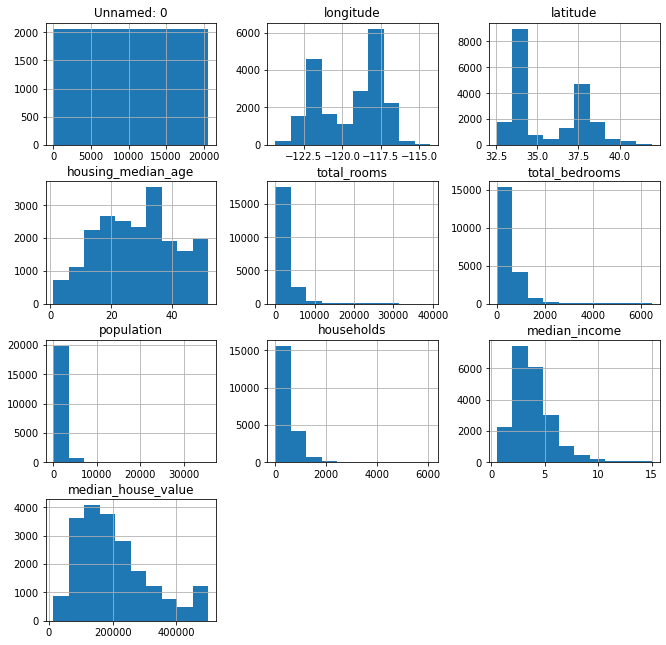

In [15]:
house_dataset.hist(figsize=(11,11)) # plot histograms of all features
plt.show()

###**Histogram to analyse the Skewness:**
- Since "households" variables do not  follow the normal distribution.
- The data looks to be right-skewed (long tail in the right).
- So we need to apply mathematical feature transformations techniques to convert this skewed distribution to a normal distribution.
- Similarly we can use **Boxplot and Distribution plot  to analyse the Skewness.**




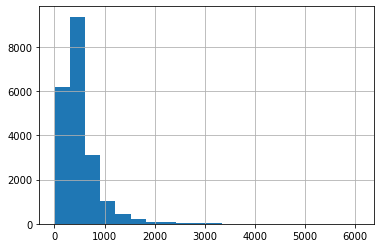

In [16]:
house_dataset["households"].hist(bins=20)  #.hist() function in pyplot module of matplotlib library.

###**Quantile-Quantile plots(Probability plot) to analyse the skewness:**
- A Q-Q plot is a plot of the **quantiles** of the first dataset(sample distribution) against the quantiles of the second dataset(theoretical distribution), for this we have to divide the dataset into two set.
- A reference line is also plotted. If the two datasets come from a population with the same distribution, the points should fall approximately along this reference line. The greater the departure from this reference line, the greater the evidence for the conclusion that the two data sets have come from populations with different distributions.


-  The data looks to be right-skewed (We can observe deviation on the right side or upper side).
- **Scipy statistics package** handel statistics, probability distributions functions and  help in Q-Q plot.


((array([-3.98611384, -3.7703327 , -3.65227474, ...,  3.65227474,
          3.7703327 ,  3.98611384]),
  array([1.000e+00, 2.000e+00, 2.000e+00, ..., 5.189e+03, 5.358e+03,
         6.082e+03])),
 (330.1442461079219, 499.5396802325583, 0.863367187712823))

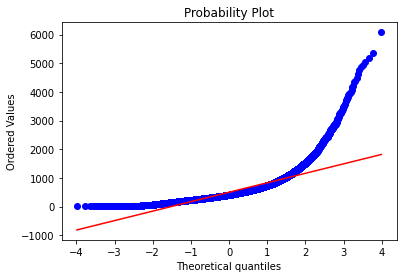

In [17]:
import scipy.stats as stats                            #handel statistics, probability distributions functions.
stats.probplot(house_dataset["households"],plot=plt)   #Probability plot  from scipy statistics packages.
    

##**Few types of Mathematical Transformation:**

###**(a)Logarithmic transformation:**
- It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal distribution(gaussian distribution).
- It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.
- In mathematics, the logarithmic function is an **inverse function to exponentiation**.
- Suppose x = $a^y$ is an exponential function then logarithmic as y= $log_a$ x.
- Then the function is given by f(x) = $log_a$ x , condition  x > 0 , a > 0, and a≠1.
- The base of the logarithm is a. This can be read it as log base a of x.
- The logarithmic function with base 10 is called the common logarithmic function.
- The logarithmic function to the base e is called the natural logarithmic function and it is denoted by $log_e$.

- **Product Rule:**  $log_a$xy = $log_a$x + $log_a$y.
- **Quotient Rule:**  $log_a$x/y = $log_a$x - $log_a$y.
- **Power Rule:** $log_ax^P$ = P$log_a$x.
- **Change of Base Rule:** $log_a$x = logx/logb
- **Zero Exponent Rule:** $log_a$ 1= 0.
- **Other rules:** $log_a$a=1 , $log_a a^x$=x

**Note:**(1)This transformation is mostly applied to **right-skewed data.**

**Note:** (2) This transformation is not applied to those features which have negative values.


###**Lets create function for histogram and Q-Q plot:**

In [18]:
def dataset_plot(dataframe, variable):     # creat function name "dataset_plot" and set parameters 'dataframe" and 'variables"
    plt.figure(figsize=((16,5)))
    plt.subplot(121)
    dataframe[variable].hist(bins=20)
    plt.xlabel(variable)
    plt.ylabel("countPoints", rotation=0)
    plt.subplot(122)
    stats.probplot(dataframe[variable], plot=plt)
    
    plt.show()

####**Before log_transformations:**
- The data looks to be right-skewed (We can observe deviation on the right side or upper side).


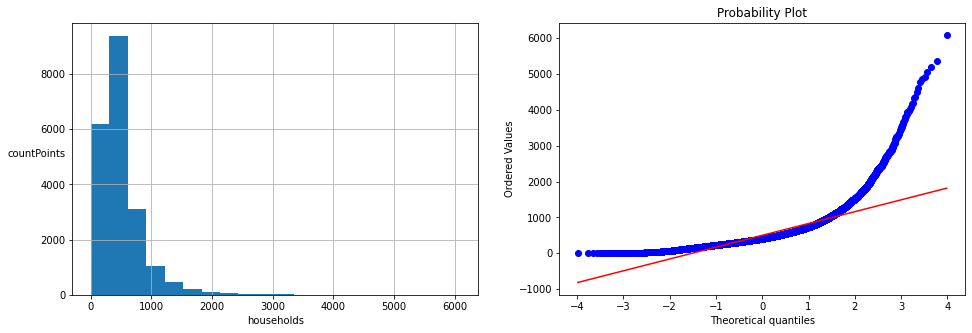

In [19]:
dataset_plot(house_dataset, 'households') #calling above function and passing arguments.

####**After log_transformations:**
- After log_transformations histogram and Q-Q plot converted towards normal distribution.
- In Q-Q plot after log_transformations most of dataset  approximately fall along with reference line.
- Since we add new column **"log_households"** now we have to remove or drop the old column **"households"** before we feed the final preprocess data to machine learning model to learn.

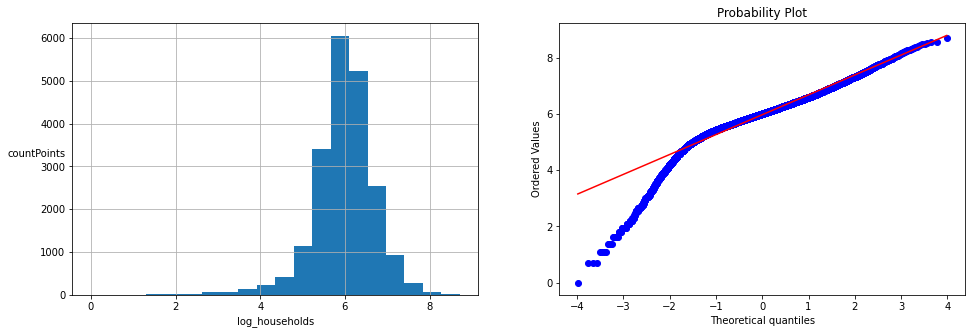

In [20]:
house_dataset['log_households'] = np.log(house_dataset["households"]) #np.log() function from numpy and creat new "log_households" column on house_dataset.
dataset_plot(house_dataset, 'log_households')         #calling above function and passing  new 'log_households' arguments. 

In [21]:
house_dataset.drop(labels='households', axis=1) #Now we have new "log_households" column so remove old "households" column.

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value,ocean_proximity,log_households
0,0,NaN,37.88,41.0,880.0,129.0,322.0,8.3252,452600.0,NEAR BAY,4.836282
1,1,NaN,37.86,21.0,7099.0,1106.0,2401.0,8.3014,358500.0,NEAR BAY,7.037028
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,7.2574,352100.0,NEAR BAY,5.176150
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,5.6431,341300.0,NEAR BAY,5.389072
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,3.8462,342200.0,NEAR BAY,5.556828
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,1.5603,78100.0,INLAND,5.799093
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,2.5568,77100.0,INLAND,4.736198
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,1.7000,92300.0,INLAND,6.070738
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,1.8672,84700.0,INLAND,5.855072


###**(b)Reciprocal transformation:**
- Reciprocal transformation also work on  **negative value** features where log_transformation isn't applicable.
- This transformation is not defined for zero.
- Lets we have input data $x$  then reciprocal is given as $\frac{1}{x}$. Condition $x$≠0
- From below plot we analyse that reciprocal transformation is not suitable for our dataset.


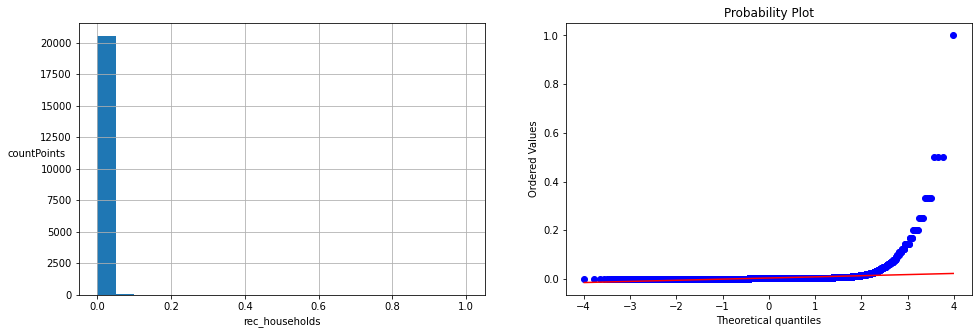

In [22]:
house_dataset['rec_households'] =1/(house_dataset["households"]) # apply Reciprocal for rec_transformations.
dataset_plot(house_dataset, 'rec_households')         #calling above function and passing  new 'rec_households' arguments. 

###**(c)Square transformation:**
- This transformation mostly applies to **left-skewed data.**
-  From below plot we analyse that Square transformation is not suitable for our dataset.



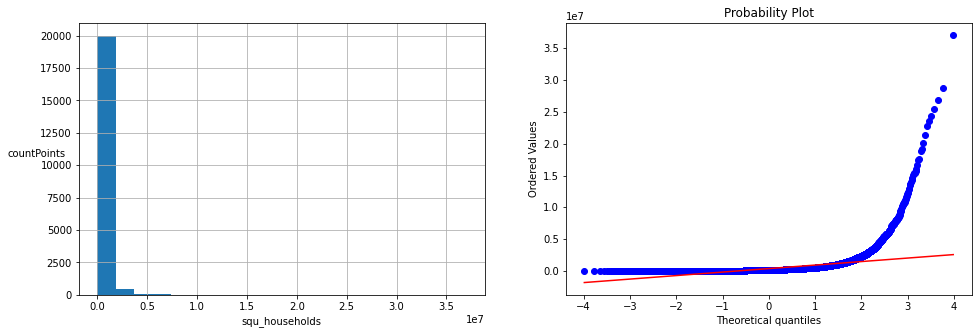

In [23]:
house_dataset['squ_households'] =np.square(house_dataset['households']) # apply square for squ_ransformations.
dataset_plot(house_dataset, 'squ_households')         #calling above function and passing  new 'squ_households' arguments. 

###**(d)Box-Cox transformation:**
- Box-cox Transformation only cares about computing the value of lambda($\lambda$)  which varies from – 5 to 5.
- Input features($x$) must be  positive.That means 0 and negative values are not supported.

- Mathematics behind Box-Cox Transformation as
$$\large{x^{\lambda} = \begin{cases}\frac{x^\lambda-1}{\lambda} &\text{if }\lambda \not= 0\\\log(x) &\text{if } \lambda = 0\end{cases}}$$

- Where, $x$ is any positive number.
- **SciPy’s stats** package provides a function called boxcox.
-After boxcox_transformations histogram and Q-Q plot converted into normal distribution.
- In Q-Q plot after boxcox_transformations most of dataset  approximately fall along with reference line.
- Set the **optimal best values of lambda** to the dataset and after using this optimal best value of lambda then our dataset is converted into normal distribution.

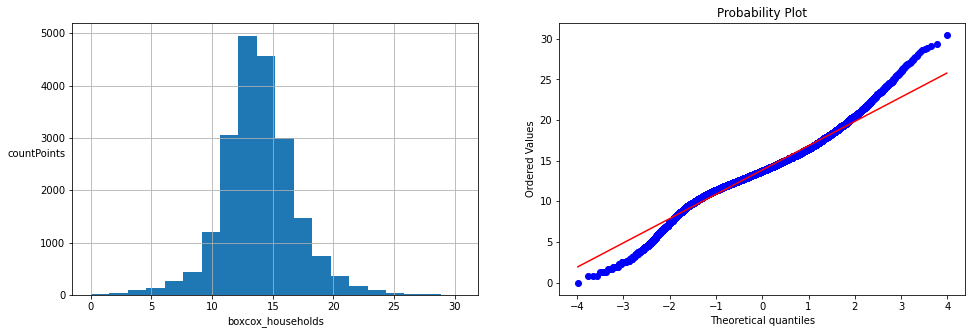

optimal_lambda =  0.24492865033686456


In [24]:
house_dataset['boxcox_households'] ,lmbd=stats.boxcox(house_dataset['households']) # apply boxcox and lambda for boxcox_transformations.
dataset_plot(house_dataset, 'boxcox_households')         #calling above function and passing  new 'boxcox_households' arguments. 
print('optimal_lambda = ', lmbd)

###**(e)Yeo-Johnson transformation:**
- **Yeo-Johnson transformation** is improvement over the box-cox transformation  and **It supports zero values and negative value features also.**

- Mathematics behind Yeo-Johnson transformation as:

$${x^{\lambda} = \begin{cases}\frac{(x+1)^\lambda-1}{\lambda} &\text{if } \lambda \not= 0, x\geq0\\\log(x+1), & \text{if } \lambda = 0, x\geq0\\\frac{-[(-x+1)^{2-\lambda}-1]}{2-\lambda} & \text{if } \lambda \not= 2, x<0 \\\log(-x+1) & \text{if } \lambda =2, x<0 
\end{cases}}$$

- SciPy’s stats package provides a function called **stats.yeojohnson.**
- Set the optimal best values of lambda to the dataset and after using this optimal best value of lambda then our dataset is converted into normal distribution.

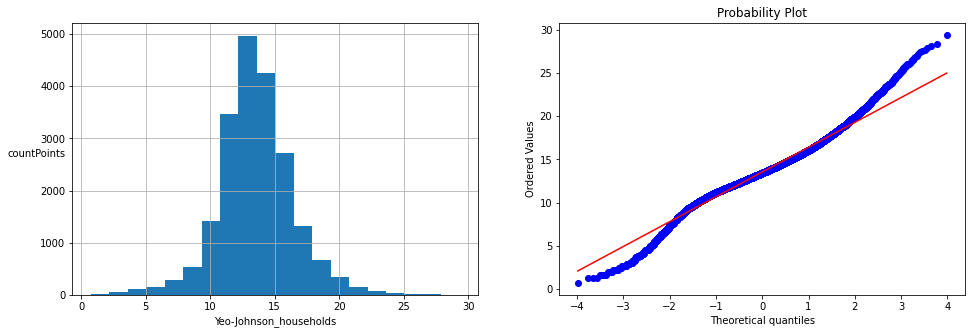

optimal_lambda =  0.2387317457553879


In [25]:
house_dataset['Yeo-Johnson_households'] ,lmbd=stats.yeojohnson(house_dataset['households']) # apply Yeo-Johnson and lambda for Yeo-Johnson_transformations.
dataset_plot(house_dataset, 'Yeo-Johnson_households')         #calling above function and passing  new 'Yeo-Johnson_households' arguments. 
print('optimal_lambda = ', lmbd)

#**Feature Scaling**
- Feature Scaling is a technique to standardize the  features present in the data in a fixed range or similar range.
- Some Machine Learning models, like Linear and Logistic regression,Principle Component Analysis(PCA), and Linear Discriminant Analysis(LDA) assume that the features follow a normal distribution(gaussian distribution). But in real life dataset most of the features/variables follow a skewed distribution.
- Some input variables may have different units (e.g. feet, kilometers, and hours). 
- By applying some feature transformations and scaling techniques to these  features, we can convert this  distribution to a normal distribution(gaussian distribution) so, this can increase the performance of our models. 
- Features having larger magnitude dominate over  smaller magnitude and nullifying the effect of smaller magnitude variables, so we need feature scaling.



##**Most Common Techniques of Feature Scaling:**


###**(a)Normalization(Min-Max Scaling):**
- Normalization is the process of rescaling data in new range of **0 and 1.**
- Normalization is good to use when **our data does not follow a normal distribution(Gaussian distribution).**
- Normalization can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
- Mathematics behind  Min-Max Scaling as:

$$\text{X_scaled} = \frac{\mathbf{x} - \min{(\mathbf{x})}}{\max{(\mathbf{x})}-\min{(\mathbf{x})}}$$
- Where, x= variable value, min(x)  = Minimum value of the variable, max(x) = Maximum value of the variable, X_scaled=Rescaling  value.

- Importing the **MinMaxScaler  from Scikit-learn.**

- Normalisation doesn't solve the problem caused by outliers so that our graps do not follow normal distribution.


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))         #creat object variable "scaler"
house_dataset["Normalization_households"] =scaler.fit_transform(house_dataset[["households"]])
scaler_df=pd.DataFrame(scaler.fit_transform(house_dataset[["Normalization_households"]]))  ##Convert numpy array generated by sklearn libraries to orginal dataframe.

print(house_dataset)

       Unnamed: 0  longitude  ...  Yeo-Johnson_households  Normalization_households
0               0        NaN  ...                9.125995                  0.020556
1               1        NaN  ...               18.290306                  0.186976
2               2    -122.24  ...               10.243530                  0.028943
3               3    -122.25  ...               10.992202                  0.035849
4               4    -122.25  ...               11.609872                  0.042427
...           ...        ...  ...                     ...                       ...
20635       20635    -121.09  ...               12.547240                  0.054103
20636       20636    -121.21  ...                8.814206                  0.018582
20637       20637    -121.22  ...               13.665479                  0.071041
20638       20638    -121.32  ...               12.771736                  0.057227
20639       20639    -121.24  ...               14.546315                  0

In [27]:
newscaler_df=house_dataset.join(scaler_df) # join the old dataset with new Normalization_households variable.
print(newscaler_df)


       Unnamed: 0  longitude  ...  Normalization_households         0
0               0        NaN  ...                  0.020556  0.020556
1               1        NaN  ...                  0.186976  0.186976
2               2    -122.24  ...                  0.028943  0.028943
3               3    -122.25  ...                  0.035849  0.035849
4               4    -122.25  ...                  0.042427  0.042427
...           ...        ...  ...                       ...       ...
20635       20635    -121.09  ...                  0.054103  0.054103
20636       20636    -121.21  ...                  0.018582  0.018582
20637       20637    -121.22  ...                  0.071041  0.071041
20638       20638    -121.32  ...                  0.057227  0.057227
20639       20639    -121.24  ...                  0.086992  0.086992

[20640 rows x 18 columns]


In [28]:
np.round(scaler_df.describe(),1) #max scaled value is 1 and min scaled value is 0.

,0
count,20640.0
mean,0.1
std,0.1
min,0.0
25%,0.0
50%,0.1
75%,0.1
max,1.0


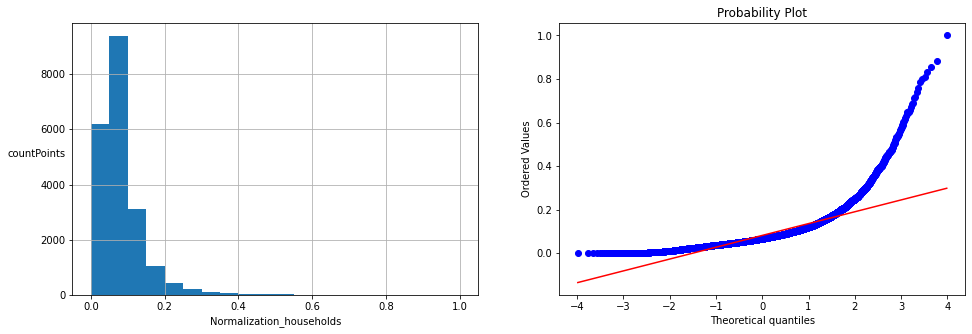

In [29]:
dataset_plot(newscaler_df, 'Normalization_households') # calling above creted function for boxplot and Q-Q plot and pass new agruments.

#### Normalisation  doesn't solve the problem caused by outliers so graph do not follow normal distribution. 

###**(b)Standardization:**
- Standardization is good to use when our data follow the normal distribution(Gaussian distribution).
- StandardScaler can often give misleading results when the data contain outliers. Outliers can often influence the sample mean and variance and hence give misleading results.
- Z score = (x -mean) / std. deviation
- $Z = \frac{x - \mu }{\sigma} $
-  More specifically, Z score tells **how many standard deviations away a data point is from the mean.**
- Importing the **StandardScaler** from Scikit-learn for standardization .
- Standardization  doesn't solve the problem caused by outliers so graph do not follow normal distribution. 

In [30]:
from sklearn.preprocessing import StandardScaler
scaler1= StandardScaler()             #creat  object variable "scaler1" 
house_dataset["Standardization_households"] = scaler1.fit_transform(house_dataset[["households"]])
scaler1_df=pd.DataFrame(scaler1.fit_transform(house_dataset[["Standardization_households"]]))  ##Convert numpy array generated by sklearn libraries to orginal dataframe.

print(house_dataset)

       Unnamed: 0  ...  Standardization_households
0               0  ...                   -0.977033
1               1  ...                    1.669961
2               2  ...                   -0.843637
3               3  ...                   -0.733781
4               4  ...                   -0.629157
...           ...  ...                         ...
20635       20635  ...                   -0.443449
20636       20636  ...                   -1.008420
20637       20637  ...                   -0.174042
20638       20638  ...                   -0.393753
20639       20639  ...                    0.079672

[20640 rows x 18 columns]


In [31]:
newscaler1_df=house_dataset.join(scaler1_df) # join the old dataset with new Standardization_households variable.
print(newscaler1_df)


       Unnamed: 0  longitude  ...  Standardization_households         0
0               0        NaN  ...                   -0.977033 -0.977033
1               1        NaN  ...                    1.669961  1.669961
2               2    -122.24  ...                   -0.843637 -0.843637
3               3    -122.25  ...                   -0.733781 -0.733781
4               4    -122.25  ...                   -0.629157 -0.629157
...           ...        ...  ...                         ...       ...
20635       20635    -121.09  ...                   -0.443449 -0.443449
20636       20636    -121.21  ...                   -1.008420 -1.008420
20637       20637    -121.22  ...                   -0.174042 -0.174042
20638       20638    -121.32  ...                   -0.393753 -0.393753
20639       20639    -121.24  ...                    0.079672  0.079672

[20640 rows x 19 columns]


In [32]:
np.round(scaler1_df.describe(),1)

,0
count,20640.0
mean,0.0
std,1.0
min,-1.3
25%,-0.6
50%,-0.2
75%,0.3
max,14.6


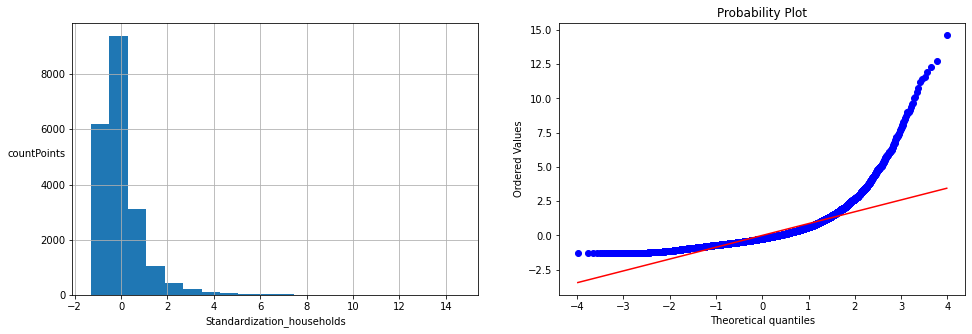

In [33]:
dataset_plot(newscaler1_df,"Standardization_households") # calling above creted function for boxplot and Q-Q plot and pass new agruments.

#### Standardization  doesn't solve the problem caused by outliers so graph do not follow normal distribution. 

###**(c)RobustScaler Scaling:**
- StandardScaler can often give misleading results when the data contain outliers. Outliers can often influence the sample mean and variance and hence give misleading results.
- In such cases, it is better to use a scalar that is **robust against outliers.**

- The RobustScaler is very similar to MinMaxScaler.
- Mathematically:
$$\text{X_robust} = \frac{\mathbf{x}-\text{Median}(\mathbf{x})}{75^{th} \text{Percentile}(\mathbf{x})- 25^{th} \text{Percentile}(\mathbf{x})}$$
-  Scikit-Learn provides a transformer called RobustScaler for this purpose.




In [34]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()                            #creat  object variable "rb" 
house_dataset["RobustScaler_households"] = rb.fit_transform(house_dataset[["households"]])
rb_df=pd.DataFrame(rb.fit_transform(house_dataset[["RobustScaler_households"]]))  ##Convert numpy array generated by sklearn libraries to orginal dataframe.

print(house_dataset)

       Unnamed: 0  ...  RobustScaler_households
0               0  ...                -0.870769
1               1  ...                 2.243077
2               2  ...                -0.713846
3               3  ...                -0.584615
4               4  ...                -0.461538
...           ...  ...                      ...
20635       20635  ...                -0.243077
20636       20636  ...                -0.907692
20637       20637  ...                 0.073846
20638       20638  ...                -0.184615
20639       20639  ...                 0.372308

[20640 rows x 19 columns]


In [36]:
newrb_df=house_dataset.join(rb_df) # join the old dataset with new RobustScaler_households variable.
print(newrb_df)

       Unnamed: 0  longitude  ...  RobustScaler_households         0
0               0        NaN  ...                -0.870769 -0.870769
1               1        NaN  ...                 2.243077  2.243077
2               2    -122.24  ...                -0.713846 -0.713846
3               3    -122.25  ...                -0.584615 -0.584615
4               4    -122.25  ...                -0.461538 -0.461538
...           ...        ...  ...                      ...       ...
20635       20635    -121.09  ...                -0.243077 -0.243077
20636       20636    -121.21  ...                -0.907692 -0.907692
20637       20637    -121.22  ...                 0.073846  0.073846
20638       20638    -121.32  ...                -0.184615 -0.184615
20639       20639    -121.24  ...                 0.372308  0.372308

[20640 rows x 20 columns]


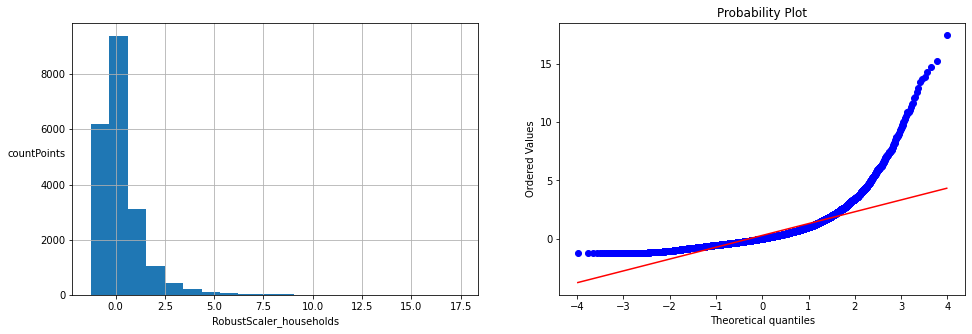

In [37]:
dataset_plot(newrb_df,"RobustScaler_households") # calling above creted function for boxplot and Q-Q plot and pass new agruments.

#### Since histogram and Q-Q plot do not show normal distribution so this techniques is not suitable for our dataset. 

#**Feature Selection**
- Feature Selection is the process of  selecting best relevent features which contributes most  in prediction.
- Feature Selection Reduces Overfitting, Improves Accuracy and Reduces Training Time.
- Feature selection is performed by either including the important features or excluding the irrelevant features in the dataset without changing them.


##**Some Techniques of Feature Selection:**

###**(a)Pearson's Correlation Coefficient  matrix:**
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

Pandas dataframe's method **.corr()** can be used to compute the correlation matrix. and seaborn for **heatmap**.

The correlation coefficient is a value that indicates the strength of the relationship between variables. The coefficient can take any values from -1 to 1. The interpretations of the values are:

- **-1: Perfect negative correlation.** The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
- **0: No correlation.** The variables do not have a relationship with each other.
- **1: Perfect positive correlation.** The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).

###**Formula:**
The correlation coefficient that indicates the strength of the relationship between two variables can be found using the following formula:

correlation coefficient($r_{xy}$) =$\frac{∑(x_i -\bar{x})	(y_i-\bar{y})}{\sqrt∑{(x_i-\bar{x})^2\sqrt ∑(y_i-\bar{y})^2}}$


Where:

- $r_{xy}$ – the correlation coefficient of the linear relationship between the variables x and y.
- $x_i$ – the values of the x-variable in a sample.
- $\bar{x}$ – the mean of the values of the x-variable.
- $y_{i}$ – the values of the y-variable in a sample.
- $\bar{y}$ – the mean of the values of the y-variable.


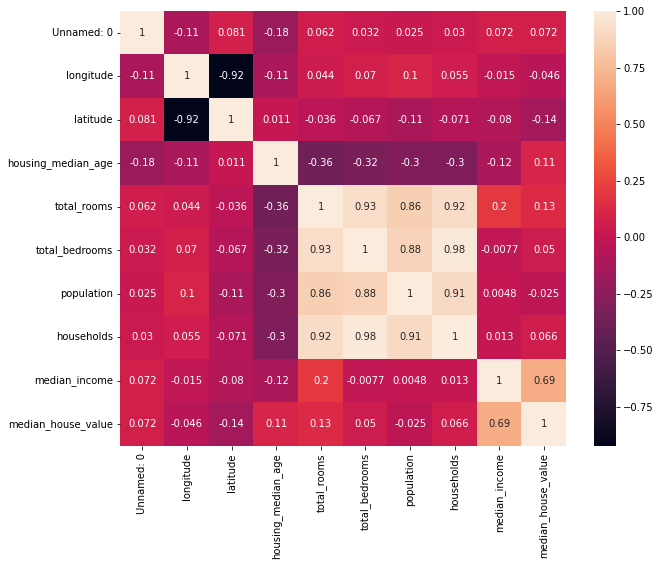

In [4]:
correlation_matrix = house_dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True)

### **Analysis of Correlation matrix to select the features:**
- Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.
-  Notice that the correlation coefficients along the diagonal of the matrix are all equal to 1 because each variable is perfectly correlated with itself.
- The correlation between total_rooms and total_bedroom is **0.93** which indicates that they’re strongly positively correlated.Higher the number of rooms indicate that higher number of  bedrooms. So we need to select one of them for module train and prediction.
- The correlation between household and total_bedroom is **0.98** which indicates that they’re strongly positively correlated.Higher the number of households indicate that higher number of  bedrooms.So we need to select one of them for module train and prediction.


- The correlation between median_house_value and longitude is **-0.046** which indicates that they’re strongly negatively correlated. 
 Higher the longitude value of house leads lowering the median_house_value.so we nne dto take both of them for module training and prediction.
- Similarly we can analysis the relation of each variables from above correlation matrix.

-

###**(b)Chi-square Test:**
- Chi-square test is a technique to determine the relationship between the **categorical variables.**
- The chi-square value is calculated between each feature and the target variable, and the desired number of features with the best chi-square value is selected.
- Mathmatically Chi-square value as:
$$\large{\chi ^2 = \Sigma\frac{(O_i - E_i)^2}{E_i}}$$


- Where, $\chi ^2$=chi squared value, $O_i$=observed value, $E_i$=	expected value.

- Higher the Chi-Square value of feature is more dependent on the response(target) and it can be selected for model training.


